# mehmetfatih

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
temperature = pd.read_csv('dataset/weatherHistory.csv', index_col=0)
temperature.index.name=['Tarih']
temperature.columns= ['genel_durum','yagis','sicaklik','hissedilen_sicaklik','nem','ruzgar_hizi','ruzgar', 'gorus_mesafesi', 'loud_cover','basinc', 'gunluk_durum']
temperature.tail(2)

,genel_durum,yagis,sicaklik,hissedilen_sicaklik,nem,ruzgar_hizi,ruzgar,gorus_mesafesi,loud_cover,basinc,gunluk_durum
[Tarih],,,,,,,,,,,
2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


## Q 1 :
Önceki derste olduğu gibi, hedef değişkeninizin görünür sıcaklık ve sıcaklık arasındaki fark olduğu bir doğrusal regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem ve rüzgar hızı kullanın. Şimdi, modelinizi OLS kullanarak tahmin edin. R-kare ve ayarlanmış R-kare değerleri nelerdir? Tatminkar olduklarını düşünüyor musunuz? Açıklayın.

In [3]:
temperature['sicaklik_farki']=temperature['sicaklik']-temperature['hissedilen_sicaklik']

In [4]:
Y = temperature['sicaklik_farki']
X = temperature[['nem','ruzgar_hizi']]
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [3.02918594 0.11929075]
Sabit değer (bias): 
 -2.4381054151877017


In [5]:
X = sm.add_constant(X)

sonuclar = sm.OLS(Y, X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sicaklik_farki   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Fri, 24 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:50:27   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.4381      0.021   -115.948      0.000      -2.479      -2.397
nem             3.0292      0.024    126.479      0.000       2.982       3.076
ruzgar_hizi     0.1193      0.001    176.164      0.000       0.118       0.121
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

""""R-squared:	0.288,
Adj. R-squared:	0.288"""
Bu, modelimizin sıcaklık farkındaki varyansın %28,8'lik bir oranla açıkladığı, %72,2'ü ise açıklamadan bıraktığı anlamına gelir. Bu nedenle modelimizin geliştirilmesi ve iyileştirilmesine ihtiyaç duymaktayız.

## Q 2 :
Daha sonra, yukarıdaki modele nem ve rüzgar hızı etkileşimini dahil edin ve OLS'yi kullanarak modeli tahmin edin. Şimdi, bu modelin R-kare değeri nedir? Bu model bir öncekine göre gelişti mi?

In [6]:
Y = temperature['sicaklik_farki']
temperature['nem_ruzgarhizi']=temperature['nem']*temperature['ruzgar_hizi']
X = temperature[['nem','ruzgar_hizi','nem_ruzgarhizi']]
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-0.17751219 -0.09048213  0.29711946]
Sabit değer (bias): 
 -0.0839363100978221


In [7]:
X = sm.add_constant(X)

sonuclar = sm.OLS(Y, X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sicaklik_farki   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Fri, 24 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:50:27   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0839      0.033     -2.511      0.012      -0.149      -0.018
nem               -0.1775      0.043     -4.133      0.000      -0.262      -0.093
ruzgar_hizi       -0.0905      0.002    -36.797      0.000      -0.095      -0.086
nem_ruzgarhizi     0.2971      0.003     88.470      0.000       0.291       0.304
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

""""R-squared:	0.341,
Adj. R-squared:	0.341"""
Bu, modelimizin sıcaklık farkındaki varyansın %34.1'lik bir oranla açıkladığı, %65.9'u ise açıklamadan bıraktığı anlamına gelir. Bir önceki modele nispeten gelişme göstermiştir. Ancak yetersiz olabilecektir. Bu nedenle modelimizin geliştirilmesi ve iyileştirilmesine ihtiyaç duymaktayız.

## Q 3 :
İlk modele ek açıklayıcı değişken olarak görünürlük ekleyin ve tahmin edin. R-kare arttı mı? Ayarlanmış R-kare değeri ne oldu? Tabloda ortaya çıkan farklılıkları, ayarlanmış R-kare içindeki iyileşme açısından etkileşim terimi ve görünürlük ile karşılaştırın. Hangisi daha kullanışlı?

In [8]:
Y = temperature['sicaklik_farki']
temperature['nem_ruzgarhizi']=temperature['nem']*temperature['ruzgar_hizi']
X = temperature[['nem','ruzgar_hizi','nem_ruzgarhizi','gorus_mesafesi']]
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-0.89092783 -0.10334797  0.31637687 -0.06459123]
Sabit değer (bias): 
 1.1006458479928323


In [9]:
X = sm.add_constant(X)

sonuclar = sm.OLS(Y, X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sicaklik_farki   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                 1.377e+04
Date:                Fri, 24 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:50:27   Log-Likelihood:            -1.6504e+05
No. Observations:               96453   AIC:                         3.301e+05
Df Residuals:                   96448   BIC:                         3.301e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.1006      0.039     28.459      0.000       1.025       1.176
nem               -0.8909      0.044    -20.263      0.000      -0.977      -0.805
ruzgar_hizi       -0.1033      0.002    -42.579      0.000      -0.108      -0.099
nem_ruzgarhizi     0.3164      0.003     95.355      0.000       0.310       0.323
gorus_mesafesi    -0.0646      0.001    -58.051      0.000      -0.067      -0.062
==============================================================================
Omnibus:                     5328.364   Durbin-Watson:                   0.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11525.074
Skew:                           0.373   Prob(JB):                         0.00
Kurtosis:                       4.520   Cond. No.                         246.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

""""R-squared:	0.364,
Adj. R-squared:	0.363"""
Bu, modelimizin sıcaklık farkındaki varyansın %36.3'lük bir oranla açıkladığı, %63.7'sını ise açıklamadan bıraktığı anlamına gelir. Bir önceki modele nispeten gelişme göstermiştir. Ancak yetersiz olabilecektir. Bu nedenle modelimizin geliştirilmesi ve iyileştirilmesine ihtiyaç duymaktayız.

In [10]:
Y = temperature['sicaklik_farki']
X = temperature[['nem','ruzgar_hizi','gorus_mesafesi']]
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [ 2.60664109  0.11990113 -0.05398318]
Sabit değer (bias): 
 -1.5755946860023338


In [11]:
X = sm.add_constant(X)

sonuclar = sm.OLS(Y, X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sicaklik_farki   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                 1.401e+04
Date:                Fri, 24 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:50:27   Log-Likelihood:            -1.6938e+05
No. Observations:               96453   AIC:                         3.388e+05
Df Residuals:                   96449   BIC:                         3.388e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5756      0.028    -56.605      0.000      -1.630      -1.521
nem                2.6066      0.025    102.784      0.000       2.557       2.656
ruzgar_hizi        0.1199      0.001    179.014      0.000       0.119       0.121
gorus_mesafesi    -0.0540      0.001    -46.614      0.000      -0.056      -0.052
==============================================================================
Omnibus:                     3833.895   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4584.022
Skew:                           0.459   Prob(JB):                         0.00
Kurtosis:                       3.545   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

""""R-squared:	0.304,
Adj. R-squared:	0.303"""
Bu modele nispeten etkileşim yaptığımız modelin daha iyi olduğuna kanaat etmemiz gerekmektedir. 

## Q 4 :
AIC ve BIC puanlarına göre yukarıdaki üç modelden en iyisini seçin. Mentor ile gerekçenizi tartışarak seçiminizi doğrulayın.

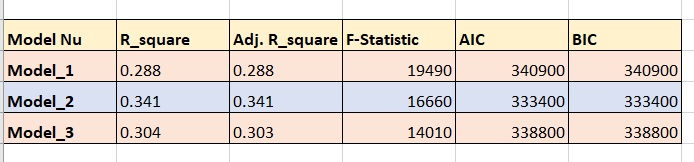

In [12]:
from IPython.display import Image
Image(filename = "dataset/r.jpg")

Statmodels'in summary() fonksiyonu bize yukarıdaki tüm metrikleri verir. Yukarıdaki tablolarda, ilk modelimiz için R-kare 0,288, ayarlanmış R-kare 0.288, F istatistiği 19490, AIC 340900 ve BIC340900, ikinci modelimiz için ise R-kare 0341, ayarlanmış R-kare 0.341, F istatistiği 16660, AIC 333400 ve BIC 333400, üçüncü modelimiz için ise R-kare 0.304, ayarlanmış R-kare 0.303, F istatistiği 14010, AIC 338800 ve BIC 338800'dir. Tüm metriklere göre, ikinci modelimiz daha iyi görünüyor.

WORK FİNİSHED.